# 1  Data visualization
## 1.1 Introduction
“The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

R has several systems for making graphs, but ggplot2 is one of the most elegant and most versatile. ggplot2 implements the grammar of graphics, a coherent system for describing and building graphs. With ggplot2, you can do more and faster by learning one system and applying it in many places.

This chapter will teach you how to visualize your data using ggplot2. We will start by creating a simple scatterplot and use that to introduce aesthetic mappings and geometric objects – the fundamental building blocks of ggplot2. We will then walk you through visualizing distributions of single variables as well as visualizing relationships between two or more variables. We’ll finish off with saving your plots and troubleshooting tips.

### 1.1.1 Prerequisites
This chapter focuses on ggplot2, one of the core packages in the tidyverse. To access the datasets, help pages, and functions used in this chapter, load the tidyverse by running:

In [ ]:
library(tidyverse)

That one line of code loads the core tidyverse; the packages that you will use in almost every data analysis. It also tells you which functions from the tidyverse conflict with functions in base R (or from other packages you might have loaded)
1.
If you run this code and get the error message there is no package called 'tidyverse', you’ll need to first install it, then run library() once again.

In [ ]:
install.packages("tidyverse")
library(tidyverse)

You only need to install a package once, but you need to load it every time you start a new session.

In addition to tidyverse, we will also use the palmerpenguins package, which includes the penguins dataset containing body measurements for penguins on three islands in the Palmer Archipelago, and the ggthemes package, which offers a colorblind safe color palette.

In [ ]:
library(palmerpenguins)


In [ ]:
library(ggthemes)

## 1.2 First steps
Do penguins with longer flippers weigh more or less than penguins with shorter flippers? You probably already have an answer, but try to make your answer precise. What does the relationship between flipper length and body mass look like? Is it positive? Negative? Linear? Nonlinear? Does the relationship vary by the species of the penguin? How about by the island where the penguin lives? Let’s create visualizations that we can use to answer these questions.

### 1.2.1 The penguins data frame
You can test your answers to those questions with the penguins data frame found in palmerpenguins (a.k.a. palmerpenguins::penguins). A data frame is a rectangular collection of variables (in the columns) and observations (in the rows). penguins contains 344 observations collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER2.

To make the discussion easier, let’s define some terms:

- A variable is a quantity, quality, or property that you can measure.
- A value is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.
- An observation is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. We’ll sometimes refer to an observation as a data point.
- Tabular data is a set of values, each associated with a variable and an observation. Tabular data is tidy if each value is placed in its own “cell”, each variable in its own column, and each observation in its own row.

In this context, a variable refers to an attribute of all the penguins, and an observation refers to all the attributes of a single penguin.

Type the name of the data frame in the console and R will print a preview of its contents. Note that it says tibble on top of this preview. In the tidyverse, we use special data frames called tibbles that you will learn more about soon.

In [ ]:
penguins

This data frame contains 8 columns. For an alternative view, where you can see all variables and the first few observations of each variable, use glimpse(). Or, if you’re in RStudio, run View(penguins) to open an interactive data viewer.


In [ ]:
glimpse(penguins)

Among the variables in penguins are:

- species: a penguin’s species (Adelie, Chinstrap, or Gentoo).
- flipper_length_mm: length of a penguin’s flipper, in millimeters.
- body_mass_g: body mass of a penguin, in grams.

To learn more about penguins, open its help page by running ?penguins.

### 1.2.2 Ultimate goal

Our ultimate goal in this chapter is to recreate the following visualization displaying the relationship between flipper lengths and body masses of these penguins, taking into consideration the species of the penguin.

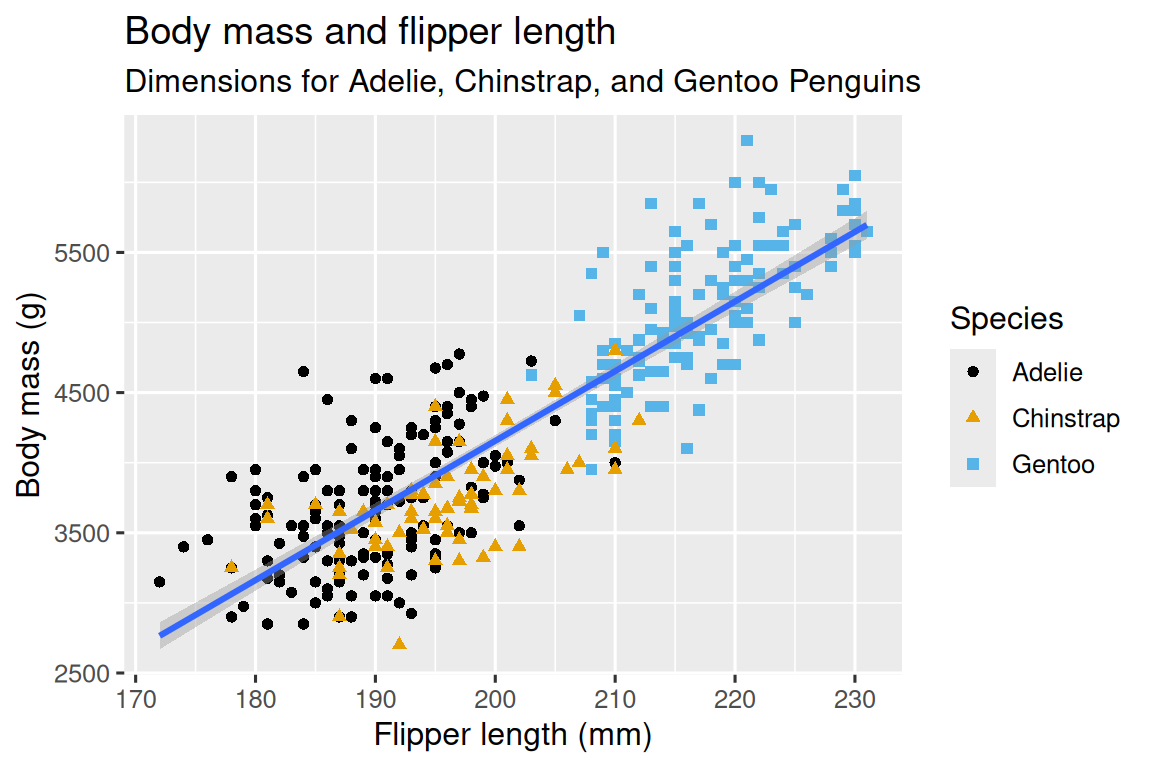

### 1.2.3 Creating a ggplot

With ggplot2, you begin a plot with the function ggplot(), defining a plot object that you then add layers to. The first argument of ggplot() is the dataset to use in the graph and so ggplot(data = penguins) creates an empty graph that is primed to display the penguins data, but since we haven’t told it how to visualize it yet, for now it’s empty. This is not a very exciting plot, but you can think of it like an empty canvas you’ll paint the remaining layers of your plot onto.


In [ ]:
ggplot(data = penguins)

Next, we need to tell ggplot() how the information from our data will be visually represented. The mapping argument of the ggplot() function defines how variables in your dataset are mapped to visual properties (aesthetics) of your plot. The mapping argument is always defined in the aes() function, and the x and y arguments of aes() specify which variables to map to the x and y axes. For now, we will only map flipper length to the x aesthetic and body mass to the y aesthetic. ggplot2 looks for the mapped variables in the data argument, in this case, penguins.

The following plot shows the result of adding these mappings.


In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
)

Our empty canvas now has more structure – it’s clear where flipper lengths will be displayed (on the x-axis) and where body masses will be displayed (on the y-axis). But the penguins themselves are not yet on the plot. This is because we have not yet articulated, in our code, how to represent the observations from our data frame on our plot.

To do so, we need to define a geom: the geometrical object that a plot uses to represent data. These geometric objects are made available in ggplot2 with functions that start with geom_. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms (geom_bar()), line charts use line geoms (geom_line()), boxplots use boxplot geoms (geom_boxplot()), scatterplots use point geoms (geom_point()), and so on.

The function geom_point() adds a layer of points to your plot, which creates a scatterplot. ggplot2 comes with many geom functions that each adds a different type of layer to a plot. You’ll learn a whole bunch of geoms throughout the book, particularly in Chapter 9.

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point()


Now we have something that looks like what we might think of as a “scatterplot”. It doesn’t yet match our “ultimate goal” plot, but using this plot we can start answering the question that motivated our exploration: “What does the relationship between flipper length and body mass look like?” The relationship appears to be positive (as flipper length increases, so does body mass), fairly linear (the points are clustered around a line instead of a curve), and moderately strong (there isn’t too much scatter around such a line). Penguins with longer flippers are generally larger in terms of their body mass.

Before we add more layers to this plot, let’s pause for a moment and review the warning message we got:

Removed 2 rows containing missing values (geom_point()).

We’re seeing this message because there are two penguins in our dataset with missing body mass and/or flipper length values and ggplot2 has no way of representing them on the plot without both of these values. Like R, ggplot2 subscribes to the philosophy that missing values should never silently go missing. This type of warning is probably one of the most common types of warnings you will see when working with real data – missing values are a very common issue and you’ll learn more about them throughout the book, particularly in Chapter 18. For the remaining plots in this chapter we will suppress this warning so it’s not printed alongside every single plot we make.

### 1.2.4 Adding aesthetics and layers
Scatterplots are useful for displaying the relationship between two numerical variables, but it’s always a good idea to be skeptical of any apparent relationship between two variables and ask if there may be other variables that explain or change the nature of this apparent relationship. For example, does the relationship between flipper length and body mass differ by species? Let’s incorporate species into our plot and see if this reveals any additional insights into the apparent relationship between these variables. We will do this by representing species with different colored points.

To achieve this, will we need to modify the aesthetic or the geom? If you guessed “in the aesthetic mapping, inside of aes()”, you’re already getting the hang of creating data visualizations with ggplot2! And if not, don’t worry. Throughout the book you will make many more ggplots and have many more opportunities to check your intuition as you make them.

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point()

When a categorical variable is mapped to an aesthetic, ggplot2 will automatically assign a unique value of the aesthetic (here a unique color) to each unique level of the variable (each of the three species), a process known as scaling. ggplot2 will also add a legend that explains which values correspond to which levels.

Now let’s add one more layer: a smooth curve displaying the relationship between body mass and flipper length. Before you proceed, refer back to the code above, and think about how we can add this to our existing plot.

Since this is a new geometric object representing our data, we will add a new geom as a layer on top of our point geom: geom_smooth(). And we will specify that we want to draw the line of best fit based on a linear model with method = "lm".

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point() +
  geom_smooth(method = "lm")

We have successfully added lines, but this plot doesn’t look like the plot from Section 1.2.2, which only has one line for the entire dataset as opposed to separate lines for each of the penguin species.

When aesthetic mappings are defined in ggplot(), at the global level, they’re passed down to each of the subsequent geom layers of the plot. However, each geom function in ggplot2 can also take a mapping argument, which allows for aesthetic mappings at the local level that are added to those inherited from the global level. Since we want points to be colored based on species but don’t want the lines to be separated out for them, we should specify color = species for geom_point() only.

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species)) +
  geom_smooth(method = "lm")

Voila! We have something that looks very much like our ultimate goal, though it’s not yet perfect. We still need to use different shapes for each species of penguins and improve labels.

It’s generally not a good idea to represent information using only colors on a plot, as people perceive colors differently due to color blindness or other color vision differences. Therefore, in addition to color, we can also map species to the shape aesthetic.

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species, shape = species)) +
  geom_smooth(method = "lm")

Note that the legend is automatically updated to reflect the different shapes of the points as well.

And finally, we can improve the labels of our plot using the labs() function in a new layer. Some of the arguments to labs() might be self explanatory: title adds a title and subtitle adds a subtitle to the plot. Other arguments match the aesthetic mappings, x is the x-axis label, y is the y-axis label, and color and shape define the label for the legend. In addition, we can improve the color palette to be colorblind safe with the scale_color_colorblind() function from the ggthemes package.

In [ ]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(aes(color = species, shape = species)) +
  geom_smooth(method = "lm") +
  labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Species"
  ) +
  scale_color_colorblind()

We finally have a plot that perfectly matches our “ultimate goal”!



### 1.2.5 Exercises
1. How many rows are in penguins? How many columns?

2. What does the bill_depth_mm variable in the penguins data frame describe? Read the help for ?penguins to find out.

3. Make a scatterplot of bill_depth_mm vs. bill_length_mm. That is, make a scatterplot with bill_depth_mm on the y-axis and bill_length_mm on the x-axis. Describe the relationship between these two variables.

4. What happens if you make a scatterplot of species vs. bill_depth_mm? What might be a better choice of geom?

5. Why does the following give an error and how would you fix it?

```r
ggplot(data = penguins) + 
  geom_point()
```
6. What does the na.rm argument do in geom_point()? What is the default value of the argument? Create a scatterplot where you successfully use this argument set to TRUE.

7. Add the following caption to the plot you made in the previous exercise: “Data come from the palmerpenguins package.” Hint: Take a look at the documentation for labs().

8. Recreate the following visualization. What aesthetic should bill_depth_mm be mapped to? And should it be mapped at the global level or at the geom level?
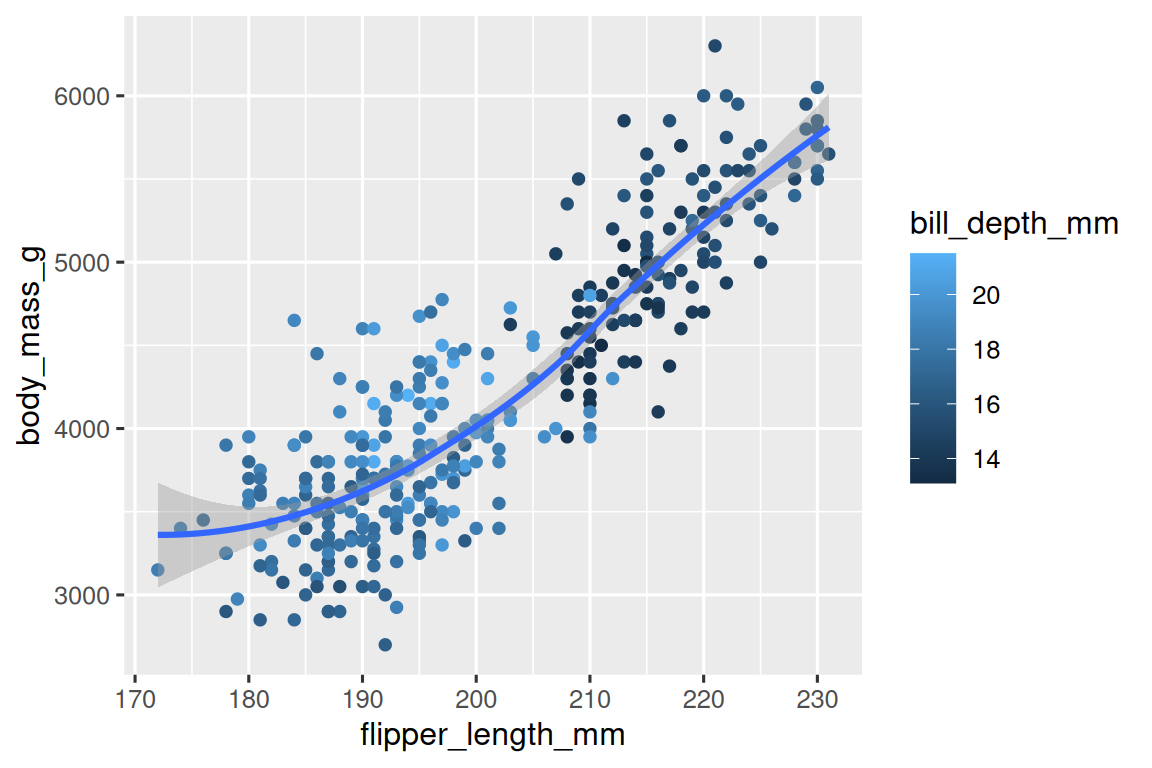

9. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.

```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)
```

10. Will these two graphs look different? Why/why not?
```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  ) +
  geom_smooth(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  )
  ```

